In [1]:
from plyer import notification

def notify():
    notification.notify(
        title='実験評価',
        message='完了',
        app_name='実験評価',
        app_icon='',
        timeout=0
    )

# Evaluate

In [2]:
from glob import glob
from python.test2 import test


methods = ['rta-cpf-eo', 'Basic', 'Wait-sufficient', 'Allocate-available', 'Decision-method']
edge_num_pattern = [3, 4, 5, 6]

data_dict = {method: {edge_num: [] for edge_num in edge_num_pattern}
             for method in methods
             }

for method in methods:
    for edge_num in edge_num_pattern:
        for file in glob(f'./DAG/Edge/{edge_num}/*.tgff'):
            data_dict[method][edge_num].append(test(file, method))

# Visualize

In [3]:
import yaml
import datetime

def make_yaml(graph_name: str, filtered_methods: list[str]):
    id = format(datetime.datetime.now(), '%y%m%d%H%M')
    yaml.safe_dump({'data': {key: value for key, value in data_dict.items() if key in filtered_methods}, 
                'x': edge_num_pattern, 'method': filtered_methods,
                'x_label': 'the maximum out edge p', 'name': graph_name
                },
                open(f'./DATA/{graph_name}_{id}.yaml', 'w'))

## Proposed vs Propoesed

./DATA/Edge\among_proposed_2402231448.yaml


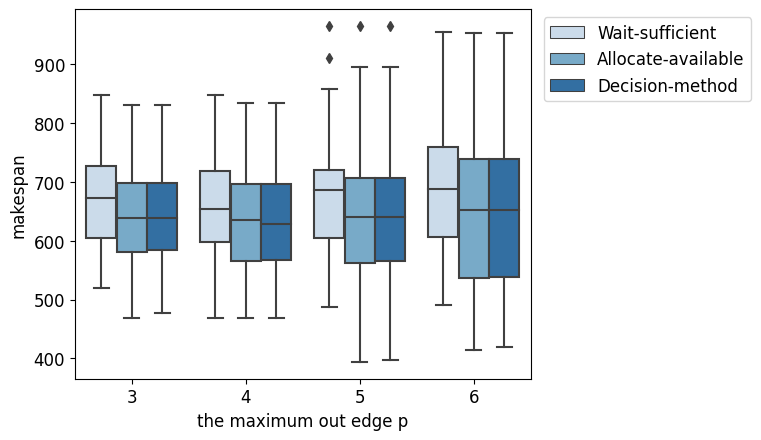

In [4]:
from python.graph.make_graph import make_graph

graph_name = 'Edge/among_proposed'
filtered_methods = ['Wait-sufficient', 'Allocate-available', 'Decision-method']
make_yaml(graph_name, filtered_methods)

# file_name = './DATA/' + 'node_among_proposed_2402231121.yaml'
file_name = glob(f'./DATA/{graph_name}_*.yaml')[-1]
print(file_name)

make_graph(file_name)

## Proposed (Decision-method) vs Existing (rta-cpf)

./DATA/Edge\with_existing_2402231448.yaml


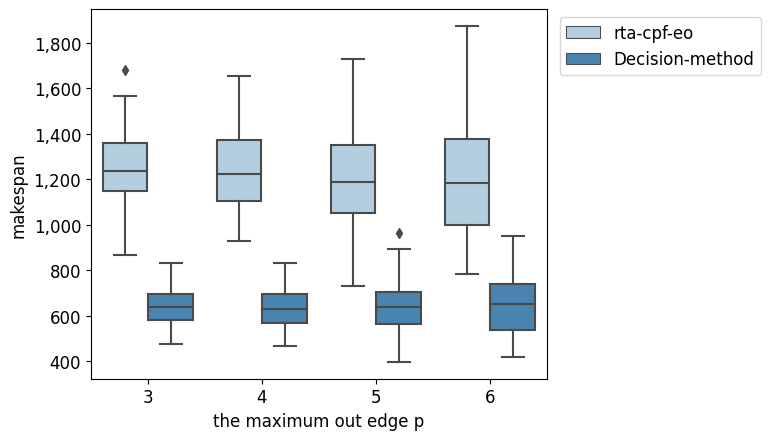

In [5]:
from python.graph.make_graph import make_graph

graph_name = 'Edge/with_existing'
filtered_methods = ['rta-cpf-eo', 'Decision-method']
make_yaml(graph_name, filtered_methods)

# file_name = './DATA/' + 'node_among_proposed_2402231121.yaml'
file_name = glob(f'./DATA/{graph_name}_*.yaml')[-1]
print(file_name)

make_graph(file_name)

## Proposed (Decision-method) vs Basic vs Existing (rta-cpf)

./DATA/Edge\with_basic_and_existing_2402231448.yaml


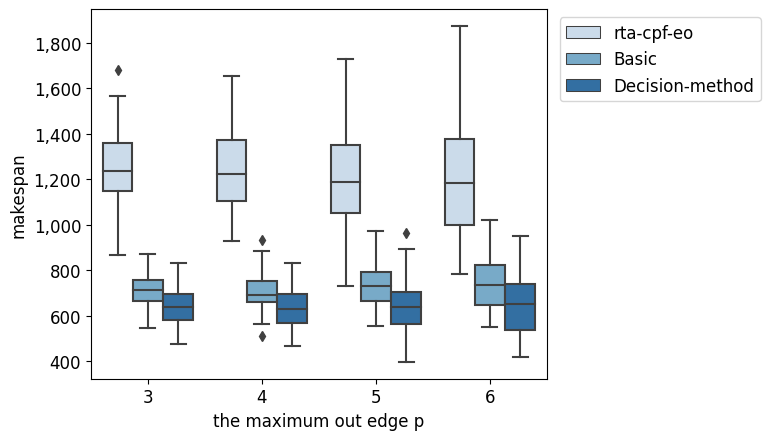

In [6]:
from python.graph.make_graph import make_graph

graph_name = 'Edge/with_basic_and_existing'
filtered_methods = ['rta-cpf-eo', 'Basic', 'Decision-method']
make_yaml(graph_name, filtered_methods)

# file_name = './DATA/' + 'node_among_proposed_2402231121.yaml'
file_name = glob(f'./DATA/{graph_name}_*.yaml')[-1]
print(file_name)

make_graph(file_name)

## (All of) Proposed vs Basic vs Existing (rta-cpf)

./DATA/Edge\with_all_methods_2402231448.yaml


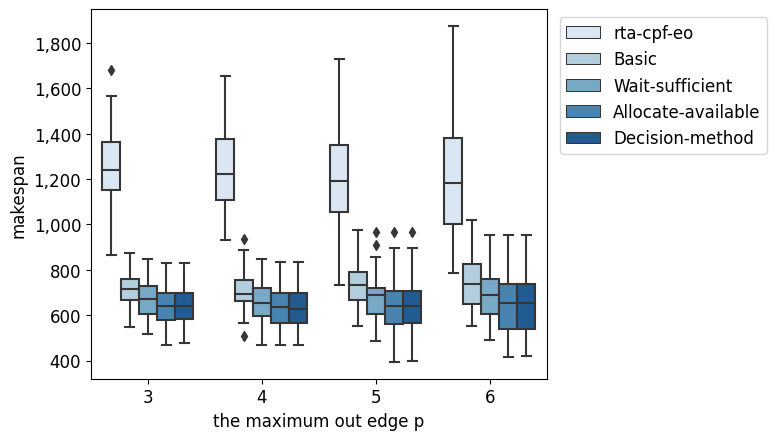

In [7]:
from python.graph.make_graph import make_graph

graph_name = 'Edge/with_all_methods'
filtered_methods = ['rta-cpf-eo', 'Basic', 'Wait-sufficient', 'Allocate-available', 'Decision-method']
make_yaml(graph_name, filtered_methods)

# file_name = './DATA/' + 'node_among_proposed_2402231121.yaml'
file_name = glob(f'./DATA/{graph_name}_*.yaml')[-1]
print(file_name)

make_graph(file_name)

In [8]:
notify()